In [30]:

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [31]:
DATADIR = '../input/cat-and-dog/training_set/training_set/'

CATEGORIES = ["cats", "dogs"]

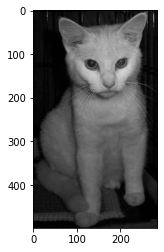

[[ 7  7  7 ... 17 22 25]
 [ 5  4  4 ... 17 22 25]
 [ 1  1  2 ... 17 21 24]
 ...
 [ 2  3  4 ... 29 29 29]
 [ 6  7  7 ... 29 29 29]
 [11 11 11 ... 29 29 29]]


In [32]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

print(img_array)

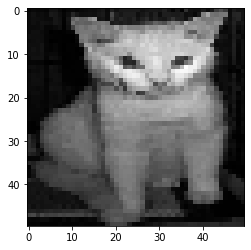

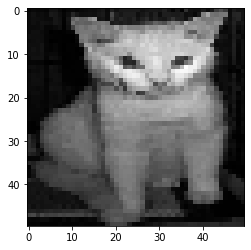

In [33]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()
training_data = []

In [34]:
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 4006/4006 [00:07<00:00, 524.54it/s]

8005


In [35]:
import random

random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

1
1
1
1
0
0
0
1
1
1
[[[[144]
   [138]
   [149]
   ...
   [139]
   [124]
   [131]]

  [[142]
   [148]
   [138]
   ...
   [172]
   [154]
   [153]]

  [[134]
   [138]
   [140]
   ...
   [148]
   [155]
   [153]]

  ...

  [[102]
   [109]
   [112]
   ...
   [145]
   [155]
   [145]]

  [[146]
   [148]
   [156]
   ...
   [153]
   [160]
   [181]]

  [[145]
   [158]
   [158]
   ...
   [207]
   [187]
   [205]]]]


In [36]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

y = np.array(y)
dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, 
                      y,
                      batch_size=32,
                      epochs=25,
                      validation_split=0.3,
                      callbacks=[tensorboard])

model.save('Cat_vs_Dog-CNN.model')



3-conv-64-nodes-0-dense-1587140064
Train on 5603 samples, validate on 2402 samples
Epoch 1/25
5603/5603 [==============================] - 18s 3ms/sample - loss: 0.6898 - accuracy: 0.5226 - val_loss: 0.6930 - val_accuracy: 0.5008
Epoch 2/25
5603/5603 [==============================] - 17s 3ms/sample - loss: 0.6575 - accuracy: 0.6161 - val_loss: 0.6247 - val_accuracy: 0.6532
Epoch 3/25
5603/5603 [==============================] - 16s 3ms/sample - loss: 0.6068 - accuracy: 0.6705 - val_loss: 0.5988 - val_accuracy: 0.6719
Epoch 4/25
5603/5603 [==============================] - 17s 3ms/sample - loss: 0.5625 - accuracy: 0.7143 - val_loss: 0.5805 - val_accuracy: 0.6986
Epoch 5/25
5603/5603 [==============================] - 17s 3ms/sample - loss: 0.5248 - accuracy: 0.7421 - val_loss: 0.5571 - val_accuracy: 0.7102
Epoch 6/25
5603/5603 [==============================] - 17s 3ms/sample - loss: 0.4930 - accuracy: 0.7664 - val_loss: 0.5264 - val_accuracy: 0.7394
Epoch 7/25
5603/5603 [=============

In [37]:
import cv2
import tensorflow as tf

CATEGORIES = ["Dog", "Cat"]


def prepare(filepath):
    IMG_SIZE = 50  # 50 in txt-based

    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    #new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model('Cat_vs_Dog-CNN.model')

prediction = model.predict([prepare('../Input/cat-and-dog/test_set/test_set/cats/cat.4001.jpg')])
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])

[[1.]]
Cat
